#
<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<h1>Reading dataset</h1>

In [3]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h2>
    Here, we define the feature variables and the target variable
</h2>

In [4]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']]
y = df['Drug']

Now, lets have a look at how various drugs respond to various age groups in the bar chart below

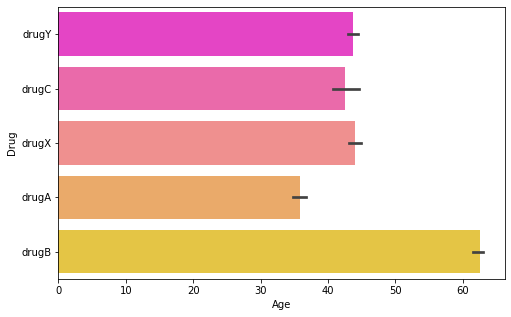

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5
sns.barplot(x="Age", y="Drug", data = df, palette = 'spring', ci=35)

We see that though results might seem mixed for Drugs Y,C,X, the drug B is certainly proven to be effective for old aged people while drug A may be effective for younger people.

Now, lets have a look at the Drugs effect on people with various Sodium to Pottassium concentration ratios.

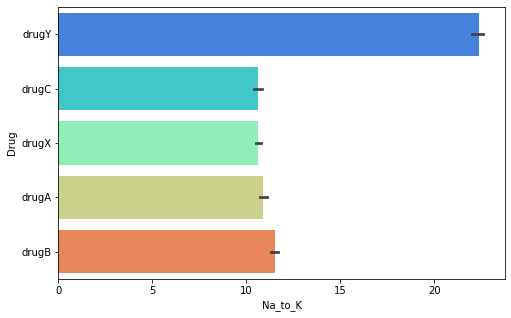

In [6]:
sns.barplot(x="Na_to_K", y="Drug", data = df, palette = 'rainbow', ci=35)

We see that drug Y is very much effective for people who have high Na/K ratio

<h2>Preprocessing</h2>
<p>
    Here, we will now process the feature variable data before training. We will convert all the categorical data to integer data.
</p>

In [9]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()

le_sex.fit(['F','M'])
X['Sex'] = le_sex.transform(X['Sex']) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X['BP'] = le_BP.transform(X['BP'])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X['Cholesterol'] = le_Chol.transform(X['Cholesterol']) 

X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [11]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<h2>Splitting into train and test dataset</h2>
<p>
    Here, we split the input dataset into training data and test data. 
</p>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=3)

<h2>Creating the model</h2>
<p>
Here, we will create an instance of the DecisionTreeClassifier and fit it to the training set. 
</p>

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2>Make predictions for test data</h2>

In [22]:
ypred = model.predict(X_test)
ypred[0:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

<h2>Accuracy of model</h2>
<p>Here we will calculate the accuracy of the model we have created using the accuracy_score method in metrics module</P>

In [23]:
from sklearn import metrics
print("Accuracy Prediction: ", metrics.accuracy_score(ypred, y_test))

Accuracy Prediction:  0.9833333333333333
